## Simple Linear Regression from Scratch


The following Data is about Auto Insurance in Sweden:

X = number of claims

Y = total payment for all the claims in thousands of Swedish Kronor

https://drive.google.com/open?id=1OE3x4xMqbjpDIvEleR_Uh3-3lQ-c1rNL


In [86]:
import numpy as np   # For Matrices Manipulations
import pandas as pd  # For Data frames etc 
import matplotlib.pyplot as plt 
import xlrd  # For Excel Files
import os   # For Changing to the Correct Directory 

In [102]:
'''
If You run from google colab:

from google.colab import drive
drive.mount('/content/drive')
os.chdir('drive/My Drive/......')  # choose the correct path
'''
df= pd.read_excel('Insurance.xls')
df

*** No CODEPAGE record, no encoding_override: will use 'ascii'


,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4
...,...,...
58,9,87.4
59,31,209.8
60,14,95.5
61,53,244.6


In [88]:
# We Chose 40 rows only for Training and the Rest for Testing 
x_train= df.iloc[:40,0].values
y_train= df.iloc[:40,1].values
x_test= df.iloc[40:,0].values
y_test= df.iloc[40:,1].values

In [89]:
print('The Features to be trained on :', x_train.shape)
print('The Labels to be trained on :', y_train.shape )
print('The Features to be tested on :', x_test.shape )
print('The Labels to be tested on :', y_test.shape )

The Features to be trained on : (40,)
The Labels to be trained on : (40,)
The Features to be tested on : (23,)
The Labels to be tested on : (23,)


<function matplotlib.pyplot.show(*args, **kw)>

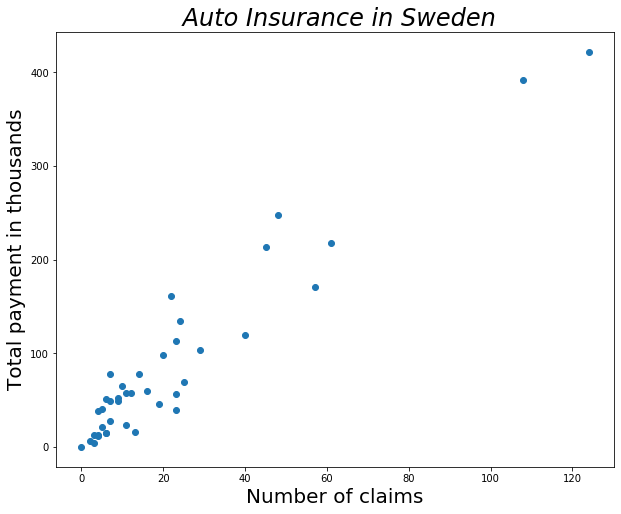

In [90]:
plt.figure(figsize=(10,8))    
plt.title(' Auto Insurance in Sweden', fontsize=24 , fontstyle='italic')  
plt.xlabel('Number of claims', fontsize=20)
plt.ylabel('Total payment in thousands', fontsize=20)
plt.scatter(x_train , y_train)  
plt.show   

In [91]:
# Mean Squared Error Function
def MSE (actual, predicted):
    '''
    Input: * actual : List of Actual Data
           * predicted: List of Predicted Data
    Return: Mean Squared Error       
    '''
    squared_error=0
    for i in range(len(actual)):
        squared_error += (actual[i]-predicted[i])**2
    return squared_error/len(actual)

In [92]:
# Mean Function
def Mean (values):
    '''
    Input: * values : List of Data
    Return: Mean of Data       
    '''
    return sum(values)/len(values)

In [93]:
# Variance Function
def Variance(values, mean):
    '''
    Input: * values : List of Data
           * mean : Mean of Data
    Return: Variance of Data       
    '''
    sum_diff=0
    for v in values:
        sum_diff += (v-mean)**2
    return sum_diff/(len(values)-1) 

In [94]:
# Covariance Function
def Covariance(x_values, y_values, x_mean, y_mean):
    '''
    Input: * x_values : List of Features
           * y_values : List of Output Labels
           * x_mean : Mean of Features
           * y_mean : Mean of Output Labels
    Return: Covariance of Data       
    '''
    sum_var= 0
    for i in range(len(x_values)):
        sum_var += (x_values[i]-x_mean)*(y_values[i]-y_mean)
    return sum_var/(len(x_values)-1)  

In [95]:
# Coefficents Function
def Coefficents(cov, var_x, x_mean, y_mean):
     '''
    Input: * cov : Covariance of Data
           * var_x : Variance of Data
           * x_mean : Mean of Features
           * y_mean : Mean of Output Labels
    Return: Coefficents of Linear Equation       
    '''
     b1= cov/var_x
     b0= y_mean - b1 * x_mean
     return b0,b1

In [96]:
# Simple Linear Regression Function
def SimpleLinearRegression(x_train, y_train, x_test):
    '''
    Input: * x_train : List of Training Features
           * y_train : List of Training Labels
           * x_test : List of Test Features
    Return: List of Prediction for Test Features       
    '''
    x_mean = Mean(x_train)
    y_mean = Mean(y_train)
    x_var= Variance(x_train, x_mean)
    cov= Covariance(x_train, y_train, x_mean, y_mean)
    b0, b1= Coefficents(cov, x_var, x_mean, y_mean)
    y_pred = b0 + x_test * b1
    return y_pred

In [97]:
# Evaluate Function
def Evaluate (x_train, y_train, x_test, y_test):
     '''
    Input: * x_train : List of Training Features
           * y_train : List of Training Labels
           * x_test : List of Test Features
           * y_test : List of Test Labels
    Return: Mean Square Error of Prediction and Actual Test Labels       
    '''
     y_pred= SimpleLinearRegression(x_train, y_train, x_test) 
     return MSE(y_test, y_pred)

<function matplotlib.pyplot.show(*args, **kw)>

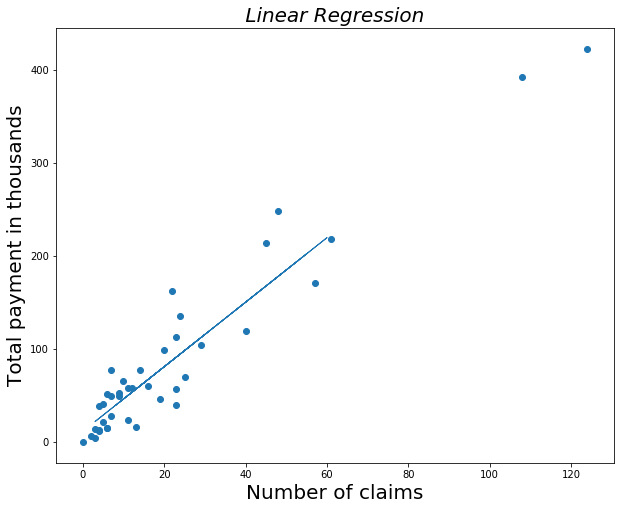

In [98]:
plt.figure(figsize=(10,8))
plt.title(' Linear Regression ', fontsize=20 , fontstyle='italic')
plt.xlabel('Number of claims', fontsize=20)
plt.ylabel('Total payment in thousands', fontsize=20)
plt.plot(x_test, SimpleLinearRegression(x_train, y_train, x_test), linewidth=1.0)  
plt.scatter(x_train ,y_train , alpha =1, label='Y')
plt.show

In [99]:
Evaluate (x_train, y_train, x_test, y_test)

2235.9038595957086